In [89]:
from sklearn import svm
from pandas import DataFrame

# Data Import

In [90]:
# Import csv to pandas
import pandas as pd

participant = ['Tyler', 'Issac', 'Ali']
classes = ['kick', 'pass', 'idle', 'walk']

cwd = "/Users/ilee/Downloads/lab/WiiFitFA-main/data/"

all_df = pd.DataFrame()
for participant in participant:
    for class_ in classes:
        for i in range (1, 11):
            # read csv
            df = pd.read_csv(f'{cwd}/{participant}/{participant}_{class_}_{i}.csv')
            # add participant and class columns
            df['class'] = class_
            all_df = pd.concat([all_df, df], ignore_index=True)

geo_df = pd.DataFrame()
for class_ in classes:
    for i in range (1, 11):
        # read csv
        df = pd.read_csv(f'{cwd}/Geoffrey/Geoffrey_{class_}_{i}.csv')
        # add participant and class columns
        df['class'] = class_
        geo_df = pd.concat([all_df, df], ignore_index=True)

# save to csv
all_df.to_csv(f'{cwd}/all_data.csv', index=False)


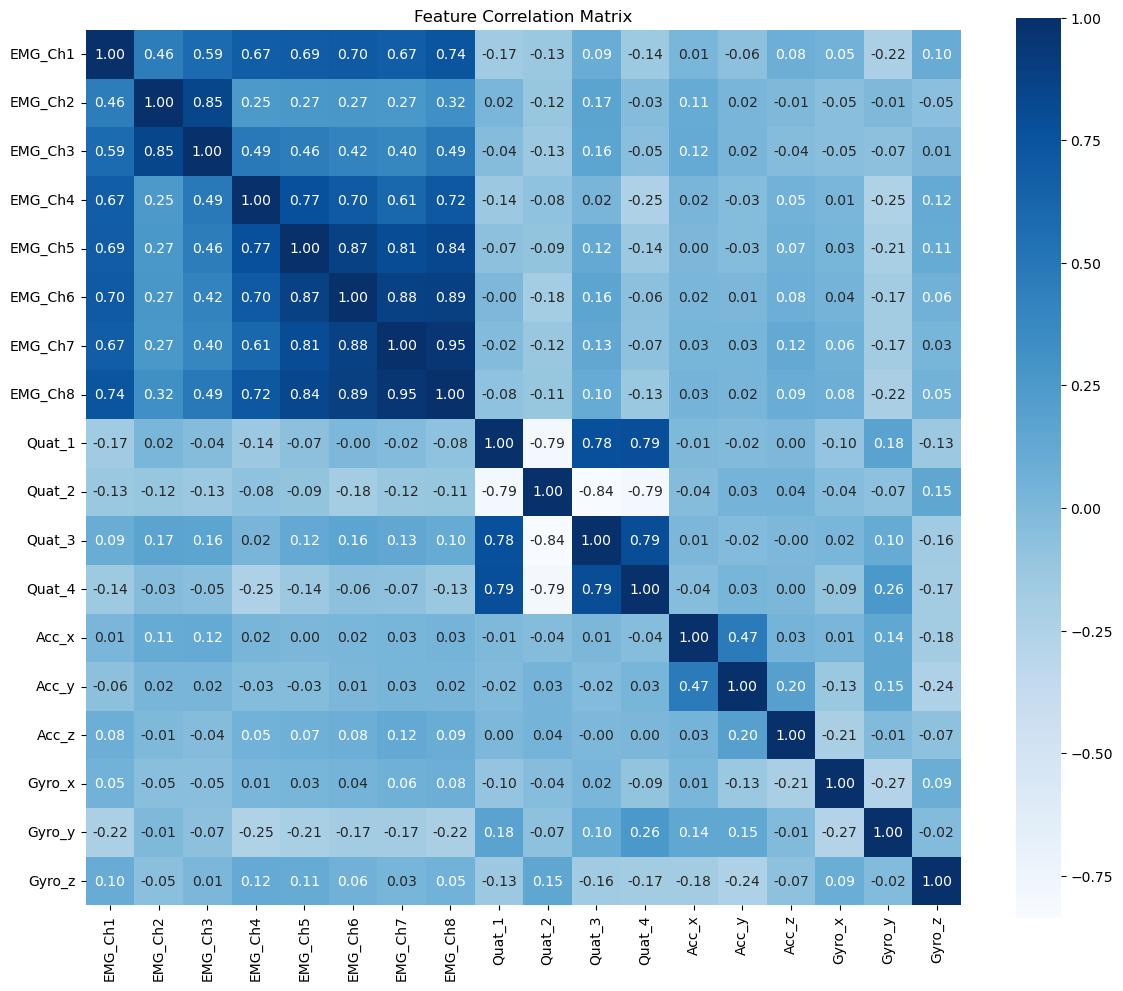

In [91]:
correlation_matrix = all_df.drop('class', axis=1).corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap="Blues")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

X = all_df.drop('class', axis=1)
X = X.values
y = all_df['class'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)

# SVC

In [93]:
from sklearn.svm import SVC
SupportVectorClassModel = SVC(kernel='rbf')
SupportVectorClassModel.fit(X_train,y_train)

SVC()

In [94]:
from sklearn.inspection import permutation_importance

r = permutation_importance(SupportVectorClassModel, X_test, y_test,
                                 n_repeats=30, random_state=0)

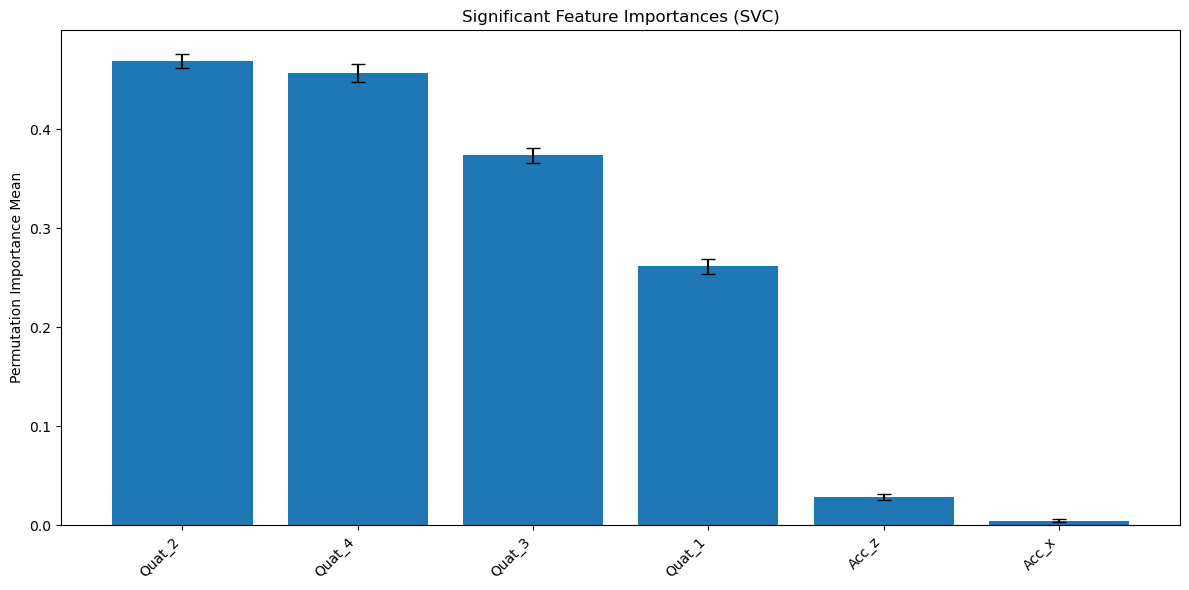

In [95]:
import matplotlib.pyplot as plt

labels = [
    "EMG_Ch1", "EMG_Ch2", "EMG_Ch3", "EMG_Ch4",
    "EMG_Ch5", "EMG_Ch6", "EMG_Ch7", "EMG_Ch8",
    "Quat_1", "Quat_2", "Quat_3", "Quat_4",
    "Acc_x", "Acc_y", "Acc_z",
    "Gyro_x", "Gyro_y", "Gyro_z"
]

# Extract importance means and stds
importances_mean = r.importances_mean
importances_std = r.importances_std

# Filter: Only include features with importance - 2*std > 0
significant_indices = [
    i for i in importances_mean.argsort()[::-1]
    if importances_mean[i] - 2 * importances_std[i] > 0
]

# Get corresponding labels and values
filtered_labels = [labels[i] for i in significant_indices]
filtered_means = importances_mean[significant_indices]
filtered_stds = importances_std[significant_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_labels, filtered_means, yerr=filtered_stds, capsize=5)
plt.ylabel("Permutation Importance Mean")
plt.title("Significant Feature Importances (SVC)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
from sklearn.metrics import classification_report

y_pred = SupportVectorClassModel.predict(X_train)
y_pred2 = SupportVectorClassModel.predict(X_test)

y_train2 = geo_df['class'].tolist()
g = geo_df.drop('class', axis=1)
y_pred3 = SupportVectorClassModel.predict(g.values)


In [97]:
print('Training set report')
print(classification_report(y_train, y_pred, target_names=classes))

Training set report
              precision    recall  f1-score   support

        kick       0.87      1.00      0.93      2377
        pass       0.96      0.92      0.94      2431
        idle       1.00      0.88      0.93      2398
        walk       0.94      0.96      0.95      2394

    accuracy                           0.94      9600
   macro avg       0.94      0.94      0.94      9600
weighted avg       0.94      0.94      0.94      9600



In [98]:
print('Test set report')
print(classification_report(y_test, y_pred2, target_names=classes))

Test set report
              precision    recall  f1-score   support

        kick       0.87      1.00      0.93       623
        pass       0.95      0.92      0.94       569
        idle       1.00      0.86      0.92       602
        walk       0.94      0.96      0.95       606

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



In [99]:
print('Geoffrey set report')
print(classification_report(y_train2, y_pred3, target_names=classes))

Geoffrey set report
              precision    recall  f1-score   support

        kick       0.87      1.00      0.93      3000
        pass       0.92      0.92      0.92      3000
        idle       1.00      0.87      0.93      3000
        walk       0.94      0.93      0.93      3100

    accuracy                           0.93     12100
   macro avg       0.93      0.93      0.93     12100
weighted avg       0.93      0.93      0.93     12100



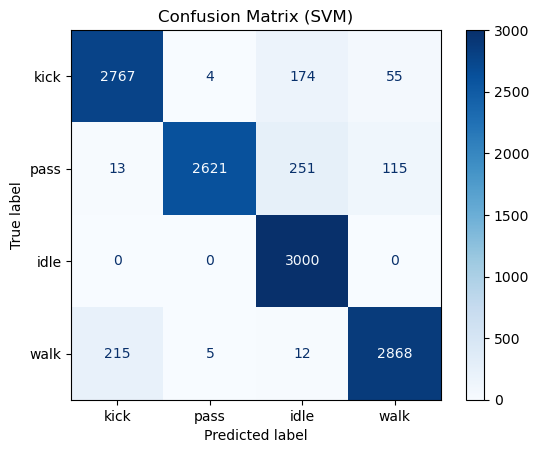

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train2, y_pred3, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Scaled SVC

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

SupportVectorClassModelScaled = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf'))

SupportVectorClassModelScaled.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [102]:
from sklearn.inspection import permutation_importance
rscaled = permutation_importance(SupportVectorClassModelScaled, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

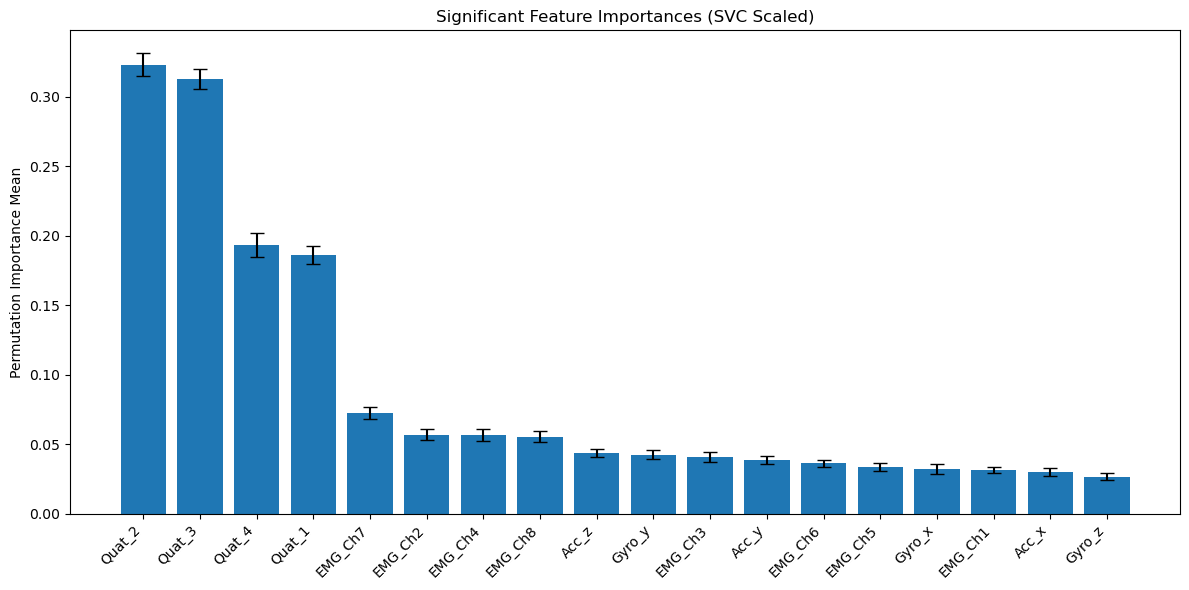

In [103]:
import matplotlib.pyplot as plt

labels = [
    "EMG_Ch1", "EMG_Ch2", "EMG_Ch3", "EMG_Ch4",
    "EMG_Ch5", "EMG_Ch6", "EMG_Ch7", "EMG_Ch8",
    "Quat_1", "Quat_2", "Quat_3", "Quat_4",
    "Acc_x", "Acc_y", "Acc_z",
    "Gyro_x", "Gyro_y", "Gyro_z"
]

# Extract importance means and stds
importances_mean = rscaled.importances_mean
importances_std = rscaled.importances_std

# Filter: Only include features with importance - 2*std > 0
significant_indices = [
    i for i in importances_mean.argsort()[::-1]
    if importances_mean[i] - 2 * importances_std[i] > 0
]

# Get corresponding labels and values
filtered_labels = [labels[i] for i in significant_indices]
filtered_means = importances_mean[significant_indices]
filtered_stds = importances_std[significant_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_labels, filtered_means, yerr=filtered_stds, capsize=5)
plt.ylabel("Permutation Importance Mean")
plt.title("Significant Feature Importances (SVC Scaled)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [104]:
from sklearn.metrics import classification_report

y_pred = SupportVectorClassModelScaled.predict(X_train)
y_pred2 = SupportVectorClassModelScaled.predict(X_test)

y_train2 = geo_df['class'].tolist()
g = geo_df.drop('class', axis=1)
y_pred3 = SupportVectorClassModelScaled.predict(g.values)


In [105]:
print('Training set report')
print(classification_report(y_train, y_pred, target_names=classes))

Training set report
              precision    recall  f1-score   support

        kick       0.91      1.00      0.95      2377
        pass       0.96      0.95      0.96      2431
        idle       0.99      0.94      0.96      2398
        walk       0.99      0.96      0.97      2394

    accuracy                           0.96      9600
   macro avg       0.96      0.96      0.96      9600
weighted avg       0.96      0.96      0.96      9600



In [106]:
print('Test set report')
print(classification_report(y_test, y_pred2, target_names=classes))

Test set report
              precision    recall  f1-score   support

        kick       0.93      0.99      0.96       623
        pass       0.96      0.96      0.96       569
        idle       0.99      0.95      0.97       602
        walk       0.99      0.97      0.98       606

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



In [107]:
print('Geoffrey set report')
print(classification_report(y_train2, y_pred3, target_names=classes))

Geoffrey set report
              precision    recall  f1-score   support

        kick       0.92      1.00      0.96      3000
        pass       0.93      0.95      0.94      3000
        idle       0.99      0.94      0.96      3000
        walk       0.99      0.93      0.96      3100

    accuracy                           0.96     12100
   macro avg       0.96      0.96      0.96     12100
weighted avg       0.96      0.96      0.96     12100



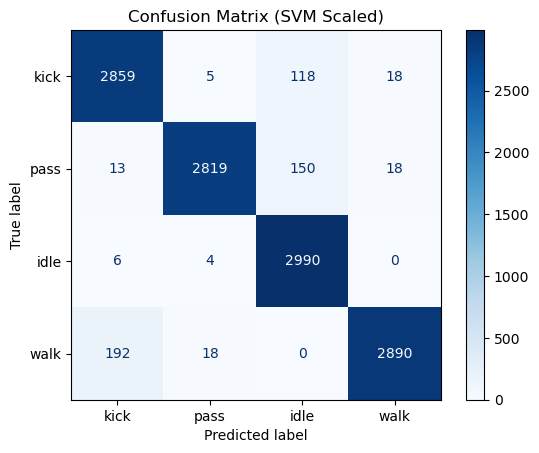

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train2, y_pred3, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (SVM Scaled)')
plt.show()

# ONNX

In [109]:

import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
model_onnx = convert_sklearn(SupportVectorClassModel, initial_types=initial_type)

with open("/Users/ilee/Downloads/lab/WiiFitFA-main/data/svm_model.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

model_onnx = convert_sklearn(SupportVectorClassModelScaled, initial_types=initial_type)

with open("/Users/ilee/Downloads/lab/WiiFitFA-main/data/svm_modelScaled.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

# Sanity Check

In [110]:

import onnxruntime as rt
import numpy as np
sess = rt.InferenceSession("/Users/ilee/Downloads/lab/WiiFitFA-main/data/svm_model.onnx")
input_name = sess.get_inputs()[0].name
# grab input from geo_df

input_data = geo_df.drop('class', axis=1).values.astype(np.float32)

# check accuracy
correct = 0
incorrect = 0
for i in range(len(input_data)):
    data = input_data[i].reshape(1, -1)
    pred = sess.run(None, {input_name: data})
    if pred[0] == geo_df['class'].iloc[i]:
        correct += 1
    else:
        incorrect += 1

print('Accuracy: ', correct / len(input_data))


Accuracy:  0.9302479338842975


In [111]:
# load the model
import onnxruntime as rt
import numpy as np
sess = rt.InferenceSession("/Users/ilee/Downloads/lab/WiiFitFA-main/data/svm_modelScaled.onnx")
input_name = sess.get_inputs()[0].name
# grab input from geo_df

input_data = geo_df.drop('class', axis=1).values.astype(np.float32)

# check accuracy
correct = 0
incorrect = 0
for i in range(len(input_data)):
    data = input_data[i].reshape(1, -1)
    pred = sess.run(None, {input_name: data})
    if pred[0] == geo_df['class'].iloc[i]:
        correct += 1
    else:
        incorrect += 1

print('Accuracy: ', correct / len(input_data))

Accuracy:  0.9552066115702479
